In [1]:
import pandas as pd
import numpy as np
%matplotlib inline 
#import matplotlib as plt
import seaborn as sns
import matplotlib.pyplot as plt

In [160]:
data= pd.read_csv('C:/Users/ssssa/Desktop/Project/Uber/pickup/uber-raw-data-aug14.csv')

In [161]:
data.head()

,Date/Time,Lat,Lon,Base
0,8/1/2014 0:03:00,40.7366,-73.9906,B02512
1,8/1/2014 0:09:00,40.7260,-73.9918,B02512
2,8/1/2014 0:12:00,40.7209,-74.0507,B02512
3,8/1/2014 0:12:00,40.7387,-73.9856,B02512
4,8/1/2014 0:12:00,40.7323,-74.0077,B02512


In [162]:
#converting to datetime format
data['date']=pd.to_datetime(data['Date/Time'], coerce=True)

C:\Users\ssssa\Anaconda2\lib\site-packages\ipykernel\__main__.py:2: FutureWarning: the coerce=True keyword is deprecated, use errors='coerce' instead
  from ipykernel import kernelapp as app


In [163]:
data.head(10)

,Date/Time,Lat,Lon,Base,date
0,8/1/2014 0:03:00,40.7366,-73.9906,B02512,2014-08-01 00:03:00
1,8/1/2014 0:09:00,40.7260,-73.9918,B02512,2014-08-01 00:09:00
2,8/1/2014 0:12:00,40.7209,-74.0507,B02512,2014-08-01 00:12:00
3,8/1/2014 0:12:00,40.7387,-73.9856,B02512,2014-08-01 00:12:00
4,8/1/2014 0:12:00,40.7323,-74.0077,B02512,2014-08-01 00:12:00
5,8/1/2014 0:13:00,40.7349,-74.0033,B02512,2014-08-01 00:13:00
6,8/1/2014 0:15:00,40.7279,-73.9542,B02512,2014-08-01 00:15:00
7,8/1/2014 0:17:00,40.7210,-73.9937,B02512,2014-08-01 00:17:00
8,8/1/2014 0:19:00,40.7195,-74.0060,B02512,2014-08-01 00:19:00
9,8/1/2014 0:20:00,40.7448,-73.9799,B02512,2014-08-01 00:20:00


In [164]:
data['day'] = data['date'].dt.day
data['dayofweek']= data['date'].dt.dayofweek
#data['dayname']=data['date'].dt.weekday_name
data['hour']=data['date'].dt.hour

In [165]:

data.head()

,Date/Time,Lat,Lon,Base,date,day,dayofweek,hour
0,8/1/2014 0:03:00,40.7366,-73.9906,B02512,2014-08-01 00:03:00,1,4,0
1,8/1/2014 0:09:00,40.7260,-73.9918,B02512,2014-08-01 00:09:00,1,4,0
2,8/1/2014 0:12:00,40.7209,-74.0507,B02512,2014-08-01 00:12:00,1,4,0
3,8/1/2014 0:12:00,40.7387,-73.9856,B02512,2014-08-01 00:12:00,1,4,0
4,8/1/2014 0:12:00,40.7323,-74.0077,B02512,2014-08-01 00:12:00,1,4,0


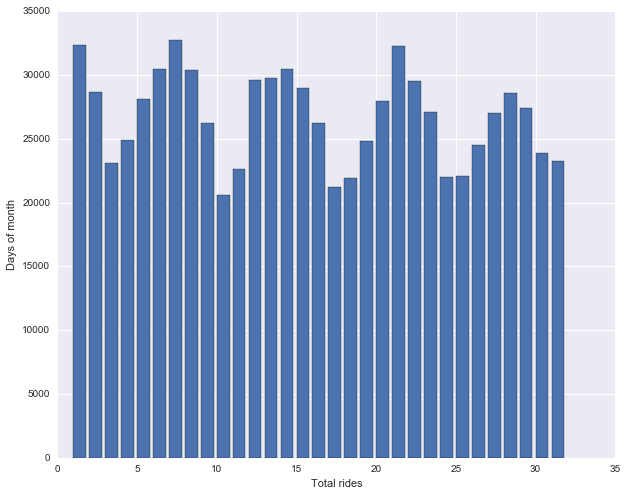

In [65]:
#Total rides in the month of August
a=data['day'].value_counts()
a=pd.DataFrame(a)
x=a.index
y=a.values
a,b = plt.subplots(figsize=(10,8))
#a,f= plt.subplot(figs)
plt.bar(x,y)
plt.xlabel('Total rides')
plt.ylabel('Days of month')

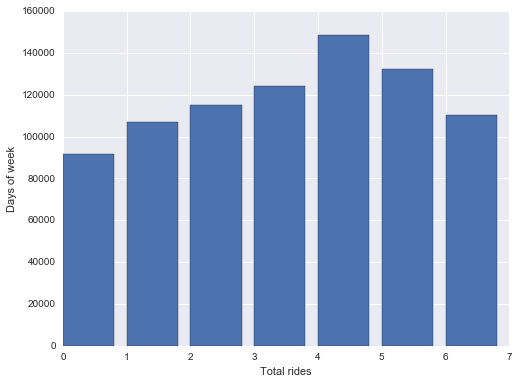

In [64]:
#tOtal ride wrt each days
b=data['dayofweek'].value_counts()
b=pd.DataFrame(b)
x=b.index
y=b.values
a,b = plt.subplots(figsize=(8,6))
#a,f= plt.subplot(figs)
plt.bar(x,y)
plt.xlabel('Total rides')
plt.ylabel('Days of week')

In [166]:
a= data.pivot_table(index='dayofweek', aggfunc='count')

In [167]:
a= data.pivot_table(index='dayofweek', aggfunc='count', values='Base')
a

dayofweek
0     91633
1    107124
2    115256
3    124117
4    148674
5    132225
6    110246
Name: Base, dtype: int64

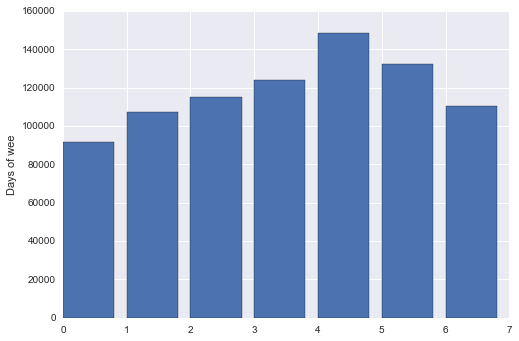

In [71]:
plt.bar(a.index, a.values)
plt.ylabel('Days of wee')

In [ ]:
#Count of picks in a day wrt time

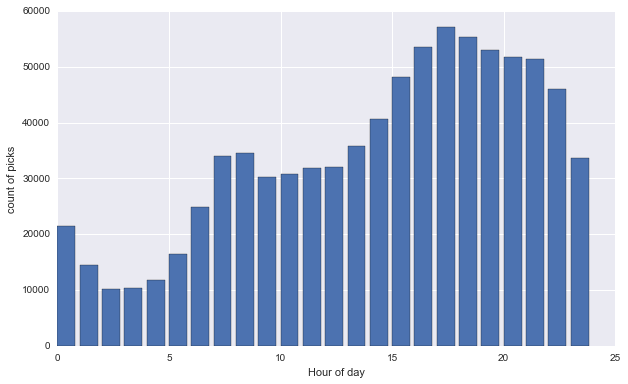

In [168]:
a= data.pivot_table(index='hour', aggfunc='count',values='Base')
x,y = plt.subplots(figsize=(10,6))
plt.bar(a.index, a.values)
plt.xlabel('Hour of day')
plt.ylabel('count of picks')

In [169]:
data['weekofday']=data.date.apply(lambda x: x.strftime('%A'))

In [170]:
gr= data.groupby('weekofday')['Base'].count().reset_index()
gr

,weekofday,Base
0,Friday,148674
1,Monday,91633
2,Saturday,132225
3,Sunday,110246
4,Thursday,124117
5,Tuesday,107124
6,Wednesday,115256


In [171]:
ar= data.groupby('hour')['Base'].count().reset_index()
ar.head()

,hour,Base
0,0,21451
1,1,14471
2,2,10105
3,3,10376
4,4,11774


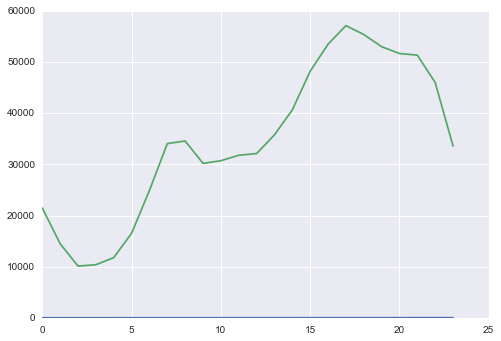

In [172]:
plt.plot(ar.index, ar.values)

In [176]:
arg=data.groupby(['weekofday','hour']).count().reset_index()
arg.head()

,weekofday,hour,Date/Time,Lat,Lon,Base,date,day,dayofweek
0,Friday,0,3536,3536,3536,3536,3536,3536,3536
1,Friday,1,2064,2064,2064,2064,2064,2064,2064
2,Friday,2,1331,1331,1331,1331,1331,1331,1331
3,Friday,3,1660,1660,1660,1660,1660,1660,1660
4,Friday,4,2162,2162,2162,2162,2162,2162,2162


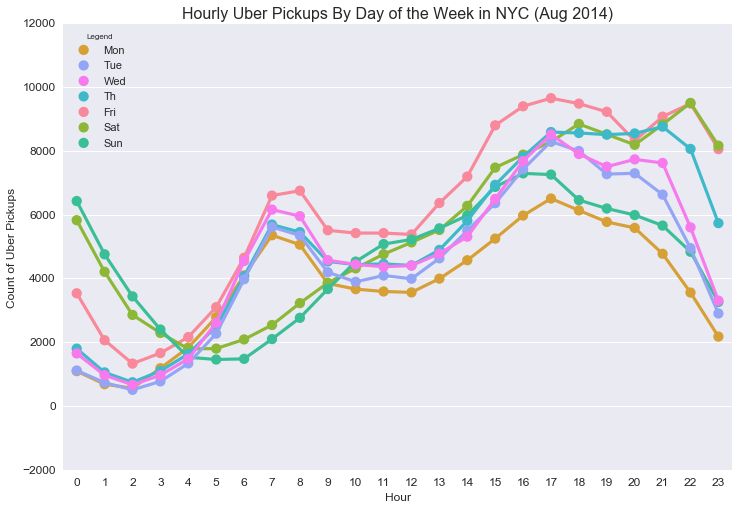

In [177]:
x,y = plt.subplots(figsize=(12,8))
ax=sns.pointplot(x='hour', y='dayofweek', hue= 'weekofday', data= arg)
handles,labels = ax.get_legend_handles_labels()
#ax.yaxis.set_major_formatter(FormatStrFormatter('%.0f'))
#Reordering of lables as Friday is at 0 (handles[0] ) instead of Monday (handles[1]), monday is 1.
handles = [handles[1], handles[5], handles[6], handles[4], handles[0], handles[2], handles[3]] 
labels = ['Mon', 'Tue', 'Wed', 'Th', 'Fri', 'Sat', 'Sun'] 
ax.set_xlabel('Hour', fontsize = 12)
ax.set_ylabel('Count of Uber Pickups', fontsize = 12)
ax.set_title('Hourly Uber Pickups By Day of the Week in NYC (Aug 2014)', fontsize=16)
ax.tick_params(labelsize = 12)
ax.legend(handles,labels,loc=0, title="Legend", prop={'size':11})
ax.get_legend().get_title().set_fontsize('8')
plt.show()

In [125]:
avg= pd.pivot_table(data=arg, index=['hour'], columns=['weekofday'], values=['dayofweek'], aggfunc='sum')
avg.head()

dayofweek                                                  
weekofday    Friday Monday Saturday Sunday Thursday Tuesday Wednesday
hour                                                                 
0              3536   1094     5828   6429     1800    1115      1649
1              2064    684     4209   4759     1055     733       967
2              1331    560     2857   3439      745     508       665
3              1660   1186     2293   2399     1099     772       967
4              2162   1836     1793   1530     1633    1337      1483

In [137]:
x= avg.ix[:,23]
x

weekofday
Friday       8056
Monday       2178
Saturday     8166
Sunday       3265
Thursday     5736
Tuesday      2903
Wednesday    3305
Name: (dayofweek, 23), dtype: int64

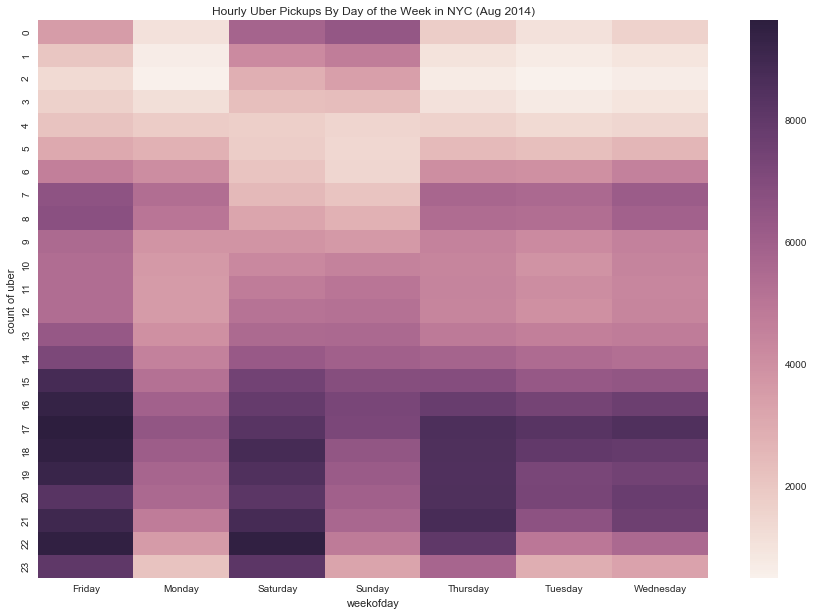

In [124]:
a,b = plt.subplots(figsize=(15,10))
sns.heatmap(avg['dayofweek'])
plt.title('Hourly Uber Pickups By Day of the Week in NYC (Aug 2014)')
plt.ylabel('count of uber ')

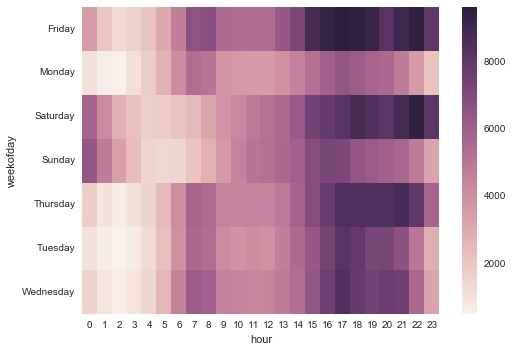

In [127]:
cc=data.groupby(['weekofday','hour']).count().reset_index()
cc.head(10)
avg= pd.pivot_table(data=cc, index=['weekofday'], columns=['hour'], values=['dayofweek'], aggfunc='sum')
sns.heatmap(avg['dayofweek'])
